# Task - Regression

#### Project Code      -  PRCP-1024
### Project Name      -  Texas Employee Salary prediction
### Data Description  -  To predict salary of employees using given features

In [1]:
# importing use-ful/basic libraries for dataframe/numerical and scientific computing/visualization

import pandas as pd # to manupilate data frame
import numpy as np # fir numeric and scientific computing
import matplotlib.pyplot as plt # for better visuals
import seaborn as sns # for visualization

In [2]:
# loaded csv file in dataframe using dataframe

df = pd.read_csv('salary.csv', low_memory=False) #low_memory=False - This lets Pandas process the file in chunks and better infer types:
pd.set_option('display.max_columns' , None)      # to view all 21 columns columns in dataframe 
df                                               # calling dataframe 

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


# Domain Analysis

In [3]:
#Listing all columns to ensure accurate data analysis.

df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

# Basic check

In [4]:
# The df.info() method in pandas provides a concise summary of your DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

In [5]:
# Descibe() , describes statistical informatiion about features

df.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [6]:
# .describe(include='O')-statistical information of categorical features

df.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,6295,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/01/17,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,12359,143,97,16


In [7]:
# summation of null values , feature wise
 
df.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
EMPLOY DATE                     0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [8]:
# calculating null values  % , column wise
null_in_percentage = pd.isnull(df).mean() * 100

#setting up threshold
high_nulls = null_in_percentage[null_in_percentage>70]

#printing columns with high null values.
high_nulls

duplicated                 99.904336
multiple_full_time_jobs    99.990634
combined_multiple_jobs     99.935109
summed_annual_salary       99.989296
hide_from_search           99.989296
dtype: float64

In [9]:
# calculated % of 0 value.
(df['HRLY RATE']==0).mean() * 100

98.83062061399107

# EDA - Exploratory Data Analysis

In [10]:
# storing numeric features for histogram

numeric_cols = df.select_dtypes(include='number').columns

# counting numeric_features for subplot indexing

len(numeric_cols)

8

## Univariate Analysis

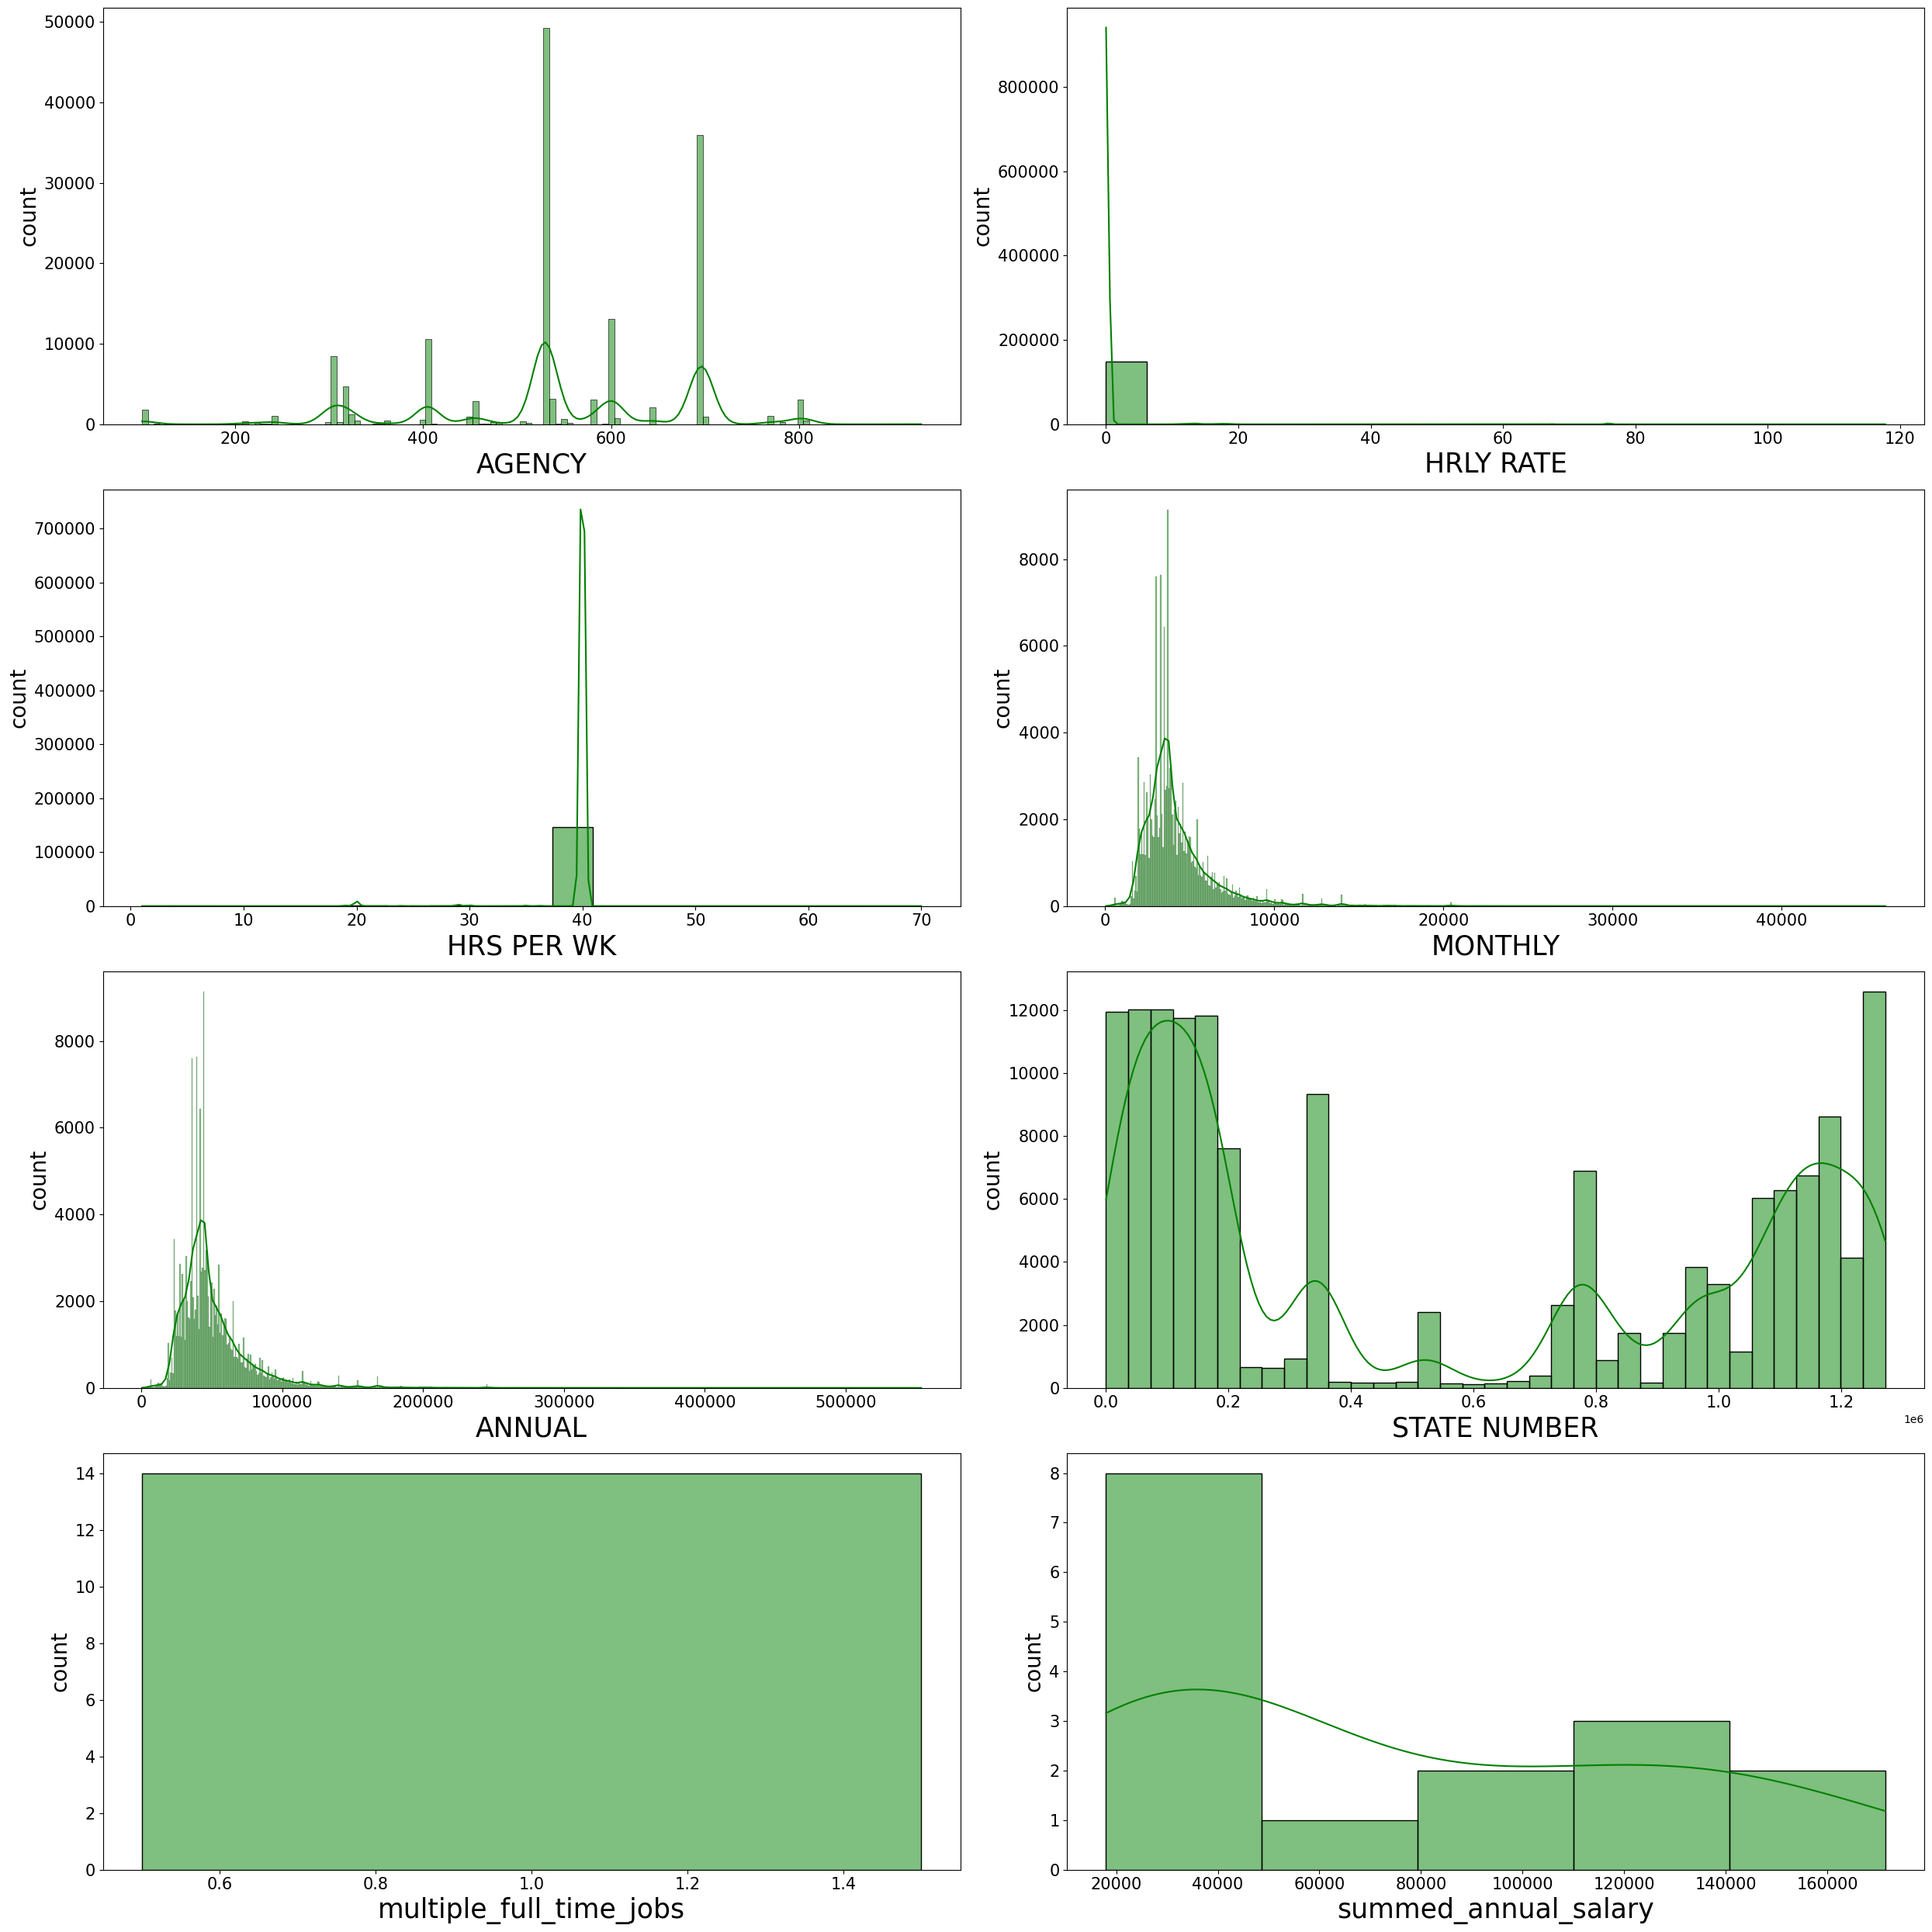

In [11]:
#plotting histplot for numeric features through a loop

plt.figure(figsize=(25,25) , facecolor='white') # defining a figure
plot_indexing = 1    # represents indexes for subplots.

for i in numeric_cols:  # iterating through numeric columns variable
    if plot_indexing<=8:
        plt.subplot(4,2,plot_indexing)   # 4- represents rows , 2 - represents columns
        sns.histplot(df[i] , kde=True , color='green')
        plt.xlabel(i , fontsize=25)
        plt.ylabel('count' , fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    plot_indexing+=1  # incrementing by one number in each iterate
plt.tight_layout()

## Bivariate Analysis

<Axes: xlabel='AGENCY', ylabel='ANNUAL'>

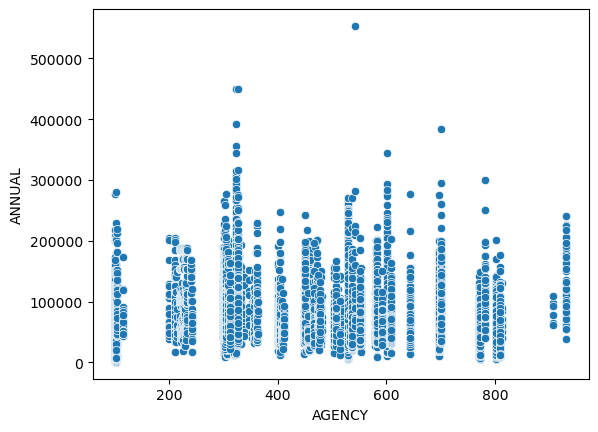

In [12]:
#Agency vs Annual Salary

sns.scatterplot(x=df['AGENCY'] , y=df['ANNUAL'])

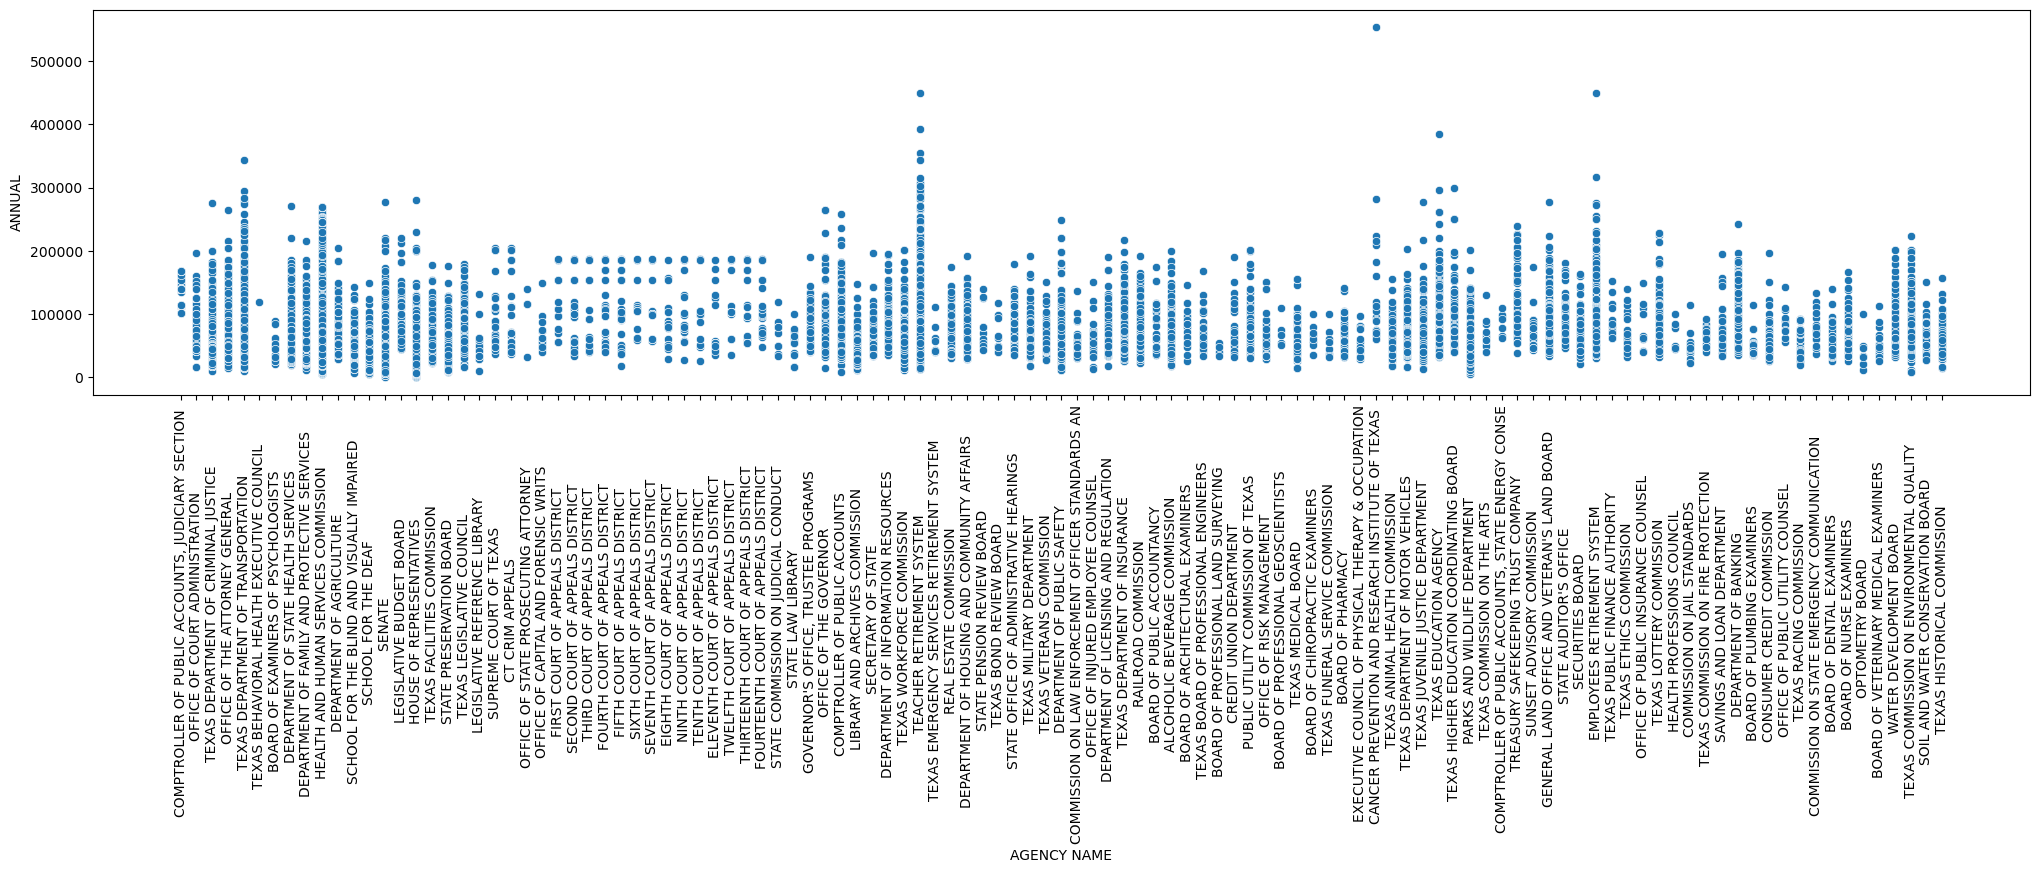

In [13]:
#Agency Names vs Annual Salary

plt.figure(figsize=(25,5))  #figsize=(width , length)
sns.scatterplot(x=df['AGENCY NAME'] , y=df['ANNUAL'])
plt.xticks(rotation=90 , fontsize=10)  # x ticks were overlapping so rotated at 90 deg.
plt.show()

<Axes: xlabel='ETHNICITY', ylabel='ANNUAL'>

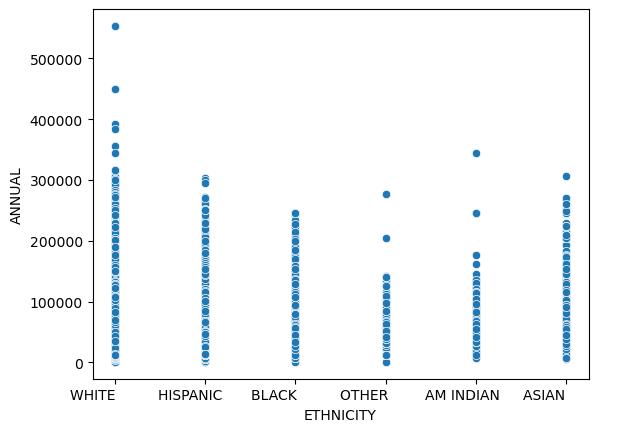

In [14]:
#Ethnicity vs Annual Salary

sns.scatterplot(x=df['ETHNICITY'] , y=df['ANNUAL'])

<Axes: xlabel='GENDER', ylabel='ANNUAL'>

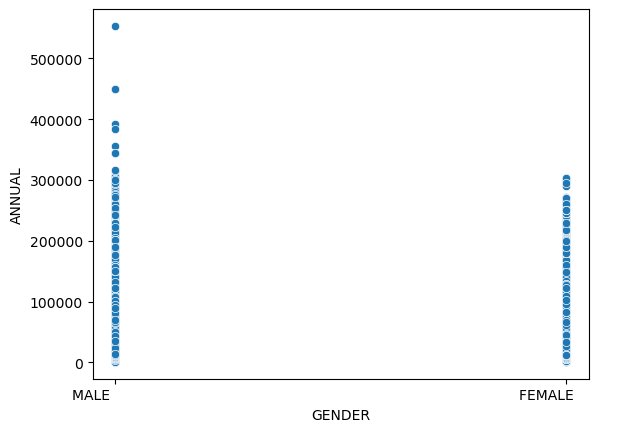

In [15]:
#Gender vs Annual Salary

sns.scatterplot(x=df['GENDER'] , y=df['ANNUAL'])

In [16]:
# old format in column - mm/dd/yy

# new format in column- yy

df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE']).dt.year

C:\Users\ompan\AppData\Local\Temp\ipykernel_5904\3010581107.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE']).dt.year


### Meaning of error

The warning we're encountering indicates that Pandas couldn't automatically determine the format of our date strings in the 'EMPLOY DATE' column. As a result, it's parsing each element individually using the dateutil parser, which can be slower

In [17]:
# renaming feature with meaningful name

df.rename({'EMPLOY DATE':'EMPLOY TENURE'} , axis=1 , inplace=True)

In [18]:
# calculating experience years 

df['EMPLOY TENURE'] = 2025-df['EMPLOY TENURE']
df['EMPLOY TENURE']

0         37
1         10
2          5
3          7
4          5
          ..
149476     8
149477    10
149478    13
149479    36
149480    13
Name: EMPLOY TENURE, Length: 149481, dtype: int32

In [19]:
df['EMPLOY TENURE'].value_counts()

EMPLOY TENURE
 6     22017
 8     20447
 7     15940
 5     14557
 9     11387
 10     7107
 11     6328
 12     6006
 13     4831
 17     3907
 21     3548
 16     3513
 14     3455
 18     3356
 15     2963
 19     2878
 20     2665
 23     1682
 25     1629
 24     1598
 22     1468
 26     1341
 27     1210
 28      960
 29      918
 30      774
 31      725
 32      523
 33      511
 35      216
 34      203
 36      199
 38      138
 37      129
 40       84
 39       77
 41       53
 42       41
 44       29
 43       21
 46       12
 45       10
 48        7
 49        5
 47        5
-48        2
-44        2
 50        1
-46        1
-47        1
-43        1
Name: count, dtype: int64

<Axes: xlabel='EMPLOY TENURE', ylabel='Count'>

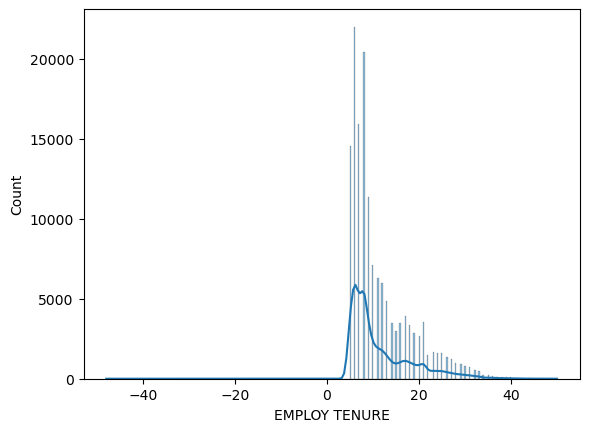

In [20]:
sns.histplot(df['EMPLOY TENURE'] , kde=True)

In [21]:
df['EMPLOY TENURE'].median()

9.0

In [22]:
#replacing minus values with null
df.loc[df['EMPLOY TENURE']< 0, 'EMPLOY TENURE'] = 9.0

<Axes: xlabel='EMPLOY TENURE', ylabel='ANNUAL'>

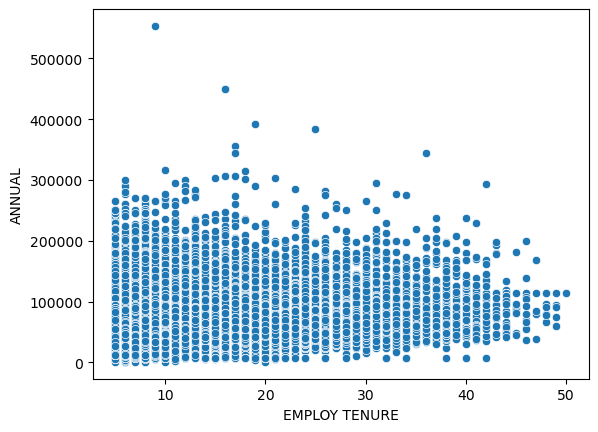

In [23]:
sns.scatterplot(x=df['EMPLOY TENURE'] , y=df['ANNUAL'])

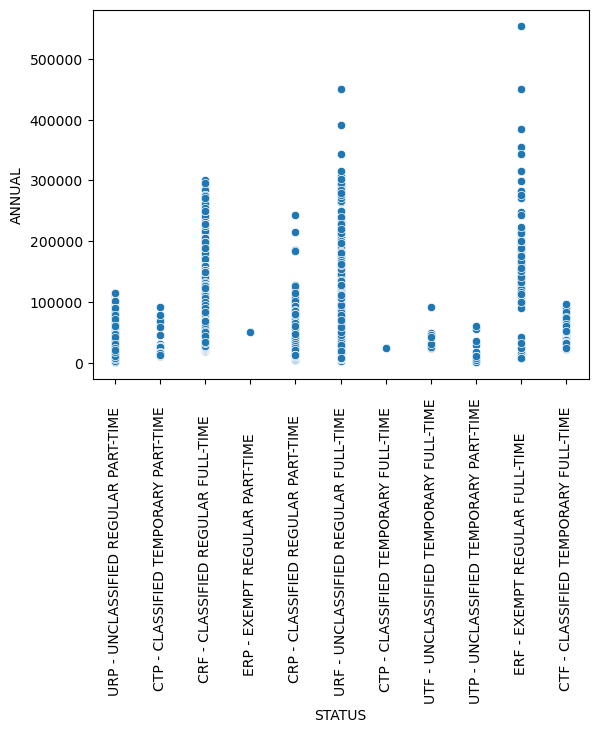

In [24]:
# Status vs Annual Salary


sns.scatterplot(x=df['STATUS'] , y=df['ANNUAL'])
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for readability
plt.show()

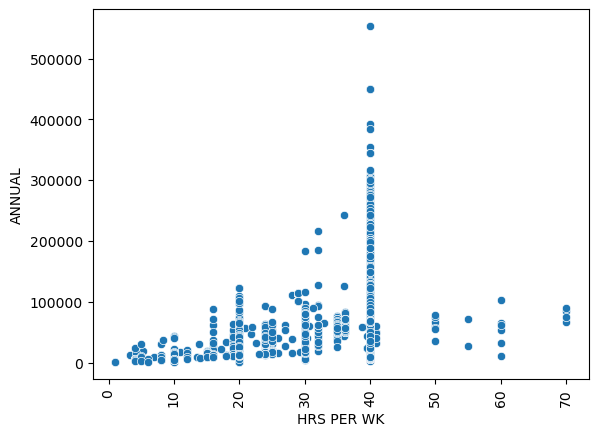

In [25]:
# Hrs per week vs Annual Salary

sns.scatterplot(x=df['HRS PER WK'] , y=df['ANNUAL'])
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for readability
plt.show()

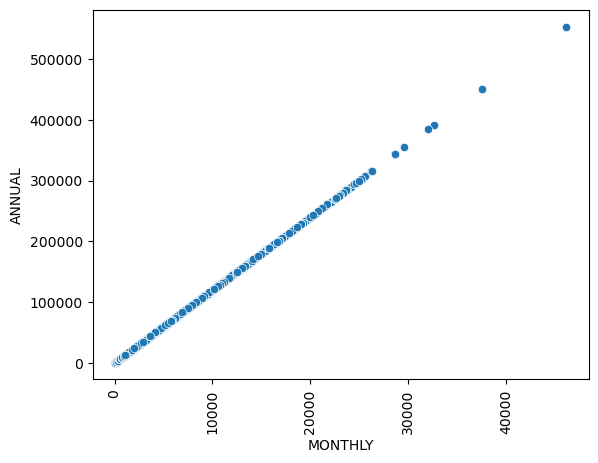

In [26]:
# Monthly vs Annual Salary

sns.scatterplot(x=df['MONTHLY'] , y=df['ANNUAL'])
plt.xticks(rotation=90, fontsize=10)  # Rotate labels for readability
plt.show()

### Insights from Univariate Analysis

1.Agency, Agency Name

-Both columns represent the same entity, with each agency having a unique ID. Therefore, keeping both is redundant and increases the scaling workload. It's better to retain only the agency name for readability.

-There is a slight variation in annual salary based on the agency. (as we have seen inn histplot , most of the datapoints ranges b/w 10,000 t0 1,20,000)

2.Ethnicity

There appears to be no significant difference in annual salary based on ethnicity.(noted few outliers in white)

3.Gender

There is no notable difference in salary based on gender.(noted few outliers in male)

4.Employ Date

Employ Tenure has less relation with annual.

5.Status

Employment status affects the target variable (annual salary). Full-time employees tend to earn more.

6.Hours Per Week

Employees working 40 hours per week receive the highest salaries on average.

7.Monthly

The monthly salary is naturally and strongly positively correlated with the annual salary, as expected.

8.Employ Tenure

No , Noticable effect of tenure(experience) on output column

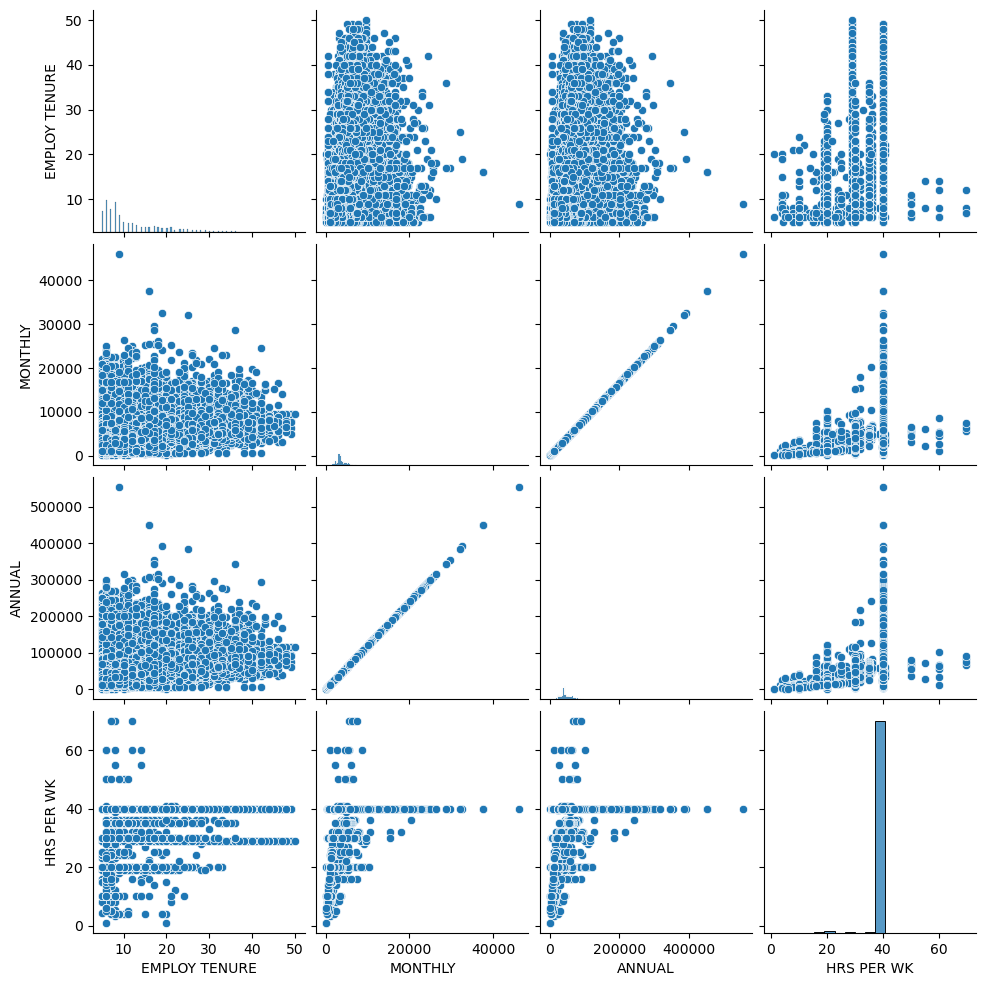

In [27]:
# Pair-Plot

sns.pairplot(data=df[['EMPLOY TENURE' , 'MONTHLY', 'ANNUAL' , 'HRS PER WK']])

# Feature Engineering

## Data Preprocessing

## Outliers Handling

<Axes: xlabel='HRS PER WK'>

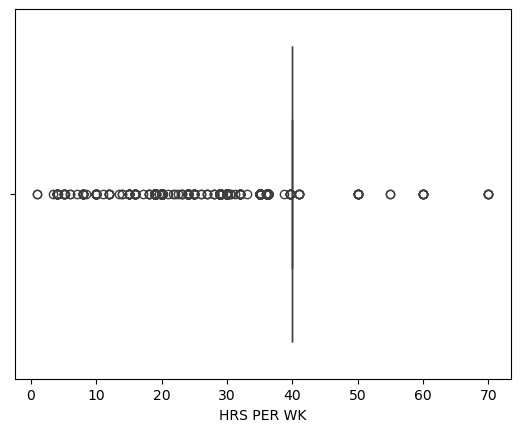

In [28]:
#HRS PER WK
#Value-40.00    Value's Frequency-146872
#we will drop this column since there is no variation.

sns.boxplot(x=df['HRS PER WK'])

<Axes: xlabel='MONTHLY'>

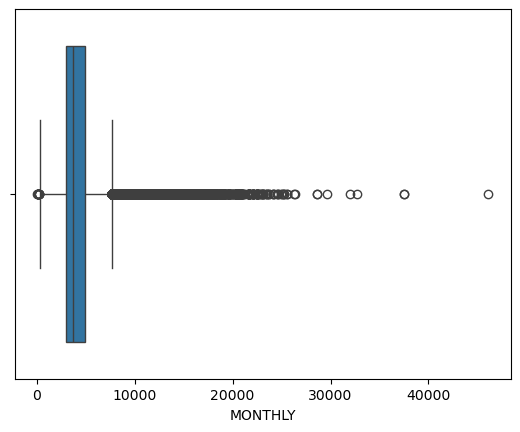

In [29]:
# this column has outliers below 250  and above 7634

sns.boxplot(x=df['MONTHLY'])

In [30]:
df['MONTHLY'].median()

3720.17

In [31]:
# Handling Outliers of MONTHLY

q1=3019.840000
q3=4865.810000

iqr=q3-q1

l_b=q1-iqr*1.5
u_b=q3+iqr*1.5

print('l.b=',l_b , 'u.b=',u_b)

df.loc[df['MONTHLY']>7634.765000000001 , 'MONTHLY'] = 3720.170000
df.loc[df['MONTHLY']<250.884 , 'MONTHLY'] = 3720.170000

l.b= 250.88499999999976 u.b= 7634.765000000001


<Axes: xlabel='EMPLOY TENURE'>

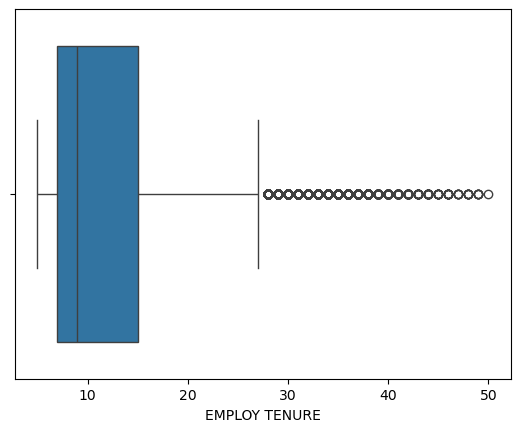

In [32]:
sns.boxplot(x=df['EMPLOY TENURE'])

In [33]:
# Handling Outliers of EMPLOY TENURE

q1=7
q3=15

iqr=q3-q1

l_b=q1-iqr*1.5
u_b=q3+iqr*1.5

print('l.b=',l_b , 'u.b=',u_b)

df.loc[df['EMPLOY TENURE']>27 , 'EMPLOY TENURE'] = 9.000000

l.b= -5.0 u.b= 27.0


## Importing Scaler

In [34]:
from sklearn.preprocessing import StandardScaler
std_scl=StandardScaler()
std_scl

StandardScaler()

In [35]:
df.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY TENURE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [36]:
# scaling continuos features

df[['EMPLOY TENURE','HRS PER WK', 'MONTHLY']] = std_scl.fit_transform(df[['EMPLOY TENURE','HRS PER WK', 'MONTHLY']])

## Importing Encoders

In [37]:
# importing label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [38]:
# we can pass only one fearture to label encoder at a time so for loop becomes handy.

for col in ['AGENCY NAME', 'CLASS TITLE']:
    df[col] = le.fit_transform(df[col])

In [39]:
# creating dummies for One-hot encoding  

dummy_genders = pd.get_dummies(df['GENDER'] , dtype=int)

In [40]:
# concatinating 2 dataframes

df=pd.concat([df , dummy_genders] , axis=1)

In [41]:
# dummies for ethinicity

dummy_ethnicity = pd.get_dummies(df['ETHNICITY'] , dtype=int)

#concating two dataframes

df = pd.concat([df , dummy_ethnicity] , axis=1)

In [42]:
# dummies for status

dummy_status = pd.get_dummies(df['STATUS'] , dtype=int)

# concatinating dataframes

df = pd.concat([df , dummy_status] , axis=1)

In [43]:
df

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY TENURE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search,FEMALE,MALE,AM INDIAN,ASIAN,BLACK,HISPANIC,OTHER,WHITE,CRF - CLASSIFIED REGULAR FULL-TIME,CRP - CLASSIFIED REGULAR PART-TIME,CTF - CLASSIFIED TEMPORARY FULL-TIME,CTP - CLASSIFIED TEMPORARY FULL-TIME,CTP - CLASSIFIED TEMPORARY PART-TIME,ERF - EXEMPT REGULAR FULL-TIME,ERP - EXEMPT REGULAR PART-TIME,URF - UNCLASSIFIED REGULAR FULL-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,UTF - UNCLASSIFIED TEMPORARY FULL-TIME,UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,241,17,RUCKER,MORTON,V,JD25,711,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,-0.294088,75.96150,-4.610854,-0.091748,114549.84,127717,True,NaN,NaN,131407.08,NaN,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,212,48,RUCKER,MORTON,V,3524,560,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,-0.110550,81.04454,-15.368878,-1.927472,16857.24,127717,True,NaN,NaN,NaN,True,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,241,17,SPECIA JR,JOHN,J,JD25,711,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,-1.028243,75.96150,-4.610854,-0.091748,114549.84,59115,True,NaN,NaN,131407.08,NaN,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,212,48,SPECIA JR,JOHN,J,3524,560,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,-0.661166,81.04453,-15.368878,-1.927472,16857.24,59115,True,NaN,NaN,NaN,True,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,696,88,ONTIVEROS,ESTHER,,4504,292,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,-1.028243,0.00000,0.122677,-0.437344,39411.24,165030,True,1.0,NaN,NaN,NaN,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,76,WESSELS,JOHN,P,6232,1198,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,-0.477627,0.00000,0.122677,-0.742798,34788.00,770781,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
149477,809,76,WINDHAM,EVAN,A,0302,1404,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,-0.110550,0.00000,0.122677,1.319358,66000.00,847431,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
149478,809,76,WRIGHT,DERRICK,C,0130,324,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,0.440066,12.93000,-8.483742,-2.152771,13447.20,34266,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
149479,809,76,YOUNG,DOUGLAS,R,1572,1007,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,-0.294088,0.00000,0.122677,1.512936,68929.92,123490,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


# Feature Selection

Dropping out some features with reasons

Feature Name - Agency  
Reason       - Agency and Agency Name both have 123 unique values and represent the same information.

Feature Name - Last & First Name, MI  
Reason       - Each record can have a unique first name, last name, and middle initial, so they do not contribute to modeling.

Feature Name - Duplicated, Multiple_full_time_jobs, Combined_multiple_jobs, Summed_annual_salary, Hide_from_search  
Reason       - More than 99% missing (null) values.

Feature Name - Hrly rate  
Reason       - Zero is repeated in 98% of the records (no one can be paid for working 0 hours per week).

Feature Name - State Number  
Reason       - Has 149,465 unique values in a dataset of 149,481 rows.  
               It's essentially a row-level unique ID — likely a primary key or record number.  
               Has no predictive value, so it should be dropped from modeling.

Feature Name - Hrs per week  
Reason       - The same value (40) is repeated 146,872 times.

Feature Name - Class Code  
Reason       - It can't be scaled or encoded directly, and Class Code and Title both represent the same information.


In [44]:
print('Unique values in Agency-',len(df['AGENCY'].unique()))

print('Unique values in Agency Name-',len(df['AGENCY NAME'].unique()))

Unique values in Agency- 113
Unique values in Agency Name- 113


In [45]:
df.corr(numeric_only=True)

,AGENCY,AGENCY NAME,CLASS TITLE,EMPLOY TENURE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary,FEMALE,MALE,AM INDIAN,ASIAN,BLACK,HISPANIC,OTHER,WHITE,CRF - CLASSIFIED REGULAR FULL-TIME,CRP - CLASSIFIED REGULAR PART-TIME,CTF - CLASSIFIED TEMPORARY FULL-TIME,CTP - CLASSIFIED TEMPORARY FULL-TIME,CTP - CLASSIFIED TEMPORARY PART-TIME,ERF - EXEMPT REGULAR FULL-TIME,ERP - EXEMPT REGULAR PART-TIME,URF - UNCLASSIFIED REGULAR FULL-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,UTF - UNCLASSIFIED TEMPORARY FULL-TIME,UTP - UNCLASSIFIED TEMPORARY PART-TIME
AGENCY,1.000000,0.434667,-0.178545,-0.014051,-0.083653,-0.013847,-0.178609,-0.266452,0.060815,NaN,-0.620697,-0.093244,0.093244,0.004737,-0.029140,0.104740,-0.075699,-0.020590,-0.009889,0.206904,0.052597,0.004906,0.004897,0.011772,-0.156912,-0.000479,-0.254490,-0.062591,-0.028635,-0.032459
AGENCY NAME,0.434667,1.000000,-0.150526,0.039933,-0.054441,-0.012687,-0.067312,-0.085757,0.021148,NaN,-0.370335,-0.190787,0.190787,0.001742,-0.011432,0.014866,-0.063613,0.032486,0.042591,-0.023474,0.038310,0.074859,0.001410,0.000793,-0.083568,-0.005045,0.042758,-0.052027,0.001648,0.002724
CLASS TITLE,-0.178545,-0.150526,1.000000,0.073777,0.014504,0.011968,0.185115,0.085747,-0.092181,NaN,-0.419293,-0.060309,0.060309,0.004297,0.023334,-0.080510,0.030496,-0.015010,0.035800,0.019316,-0.029605,-0.025187,-0.001920,-0.012173,-0.043909,-0.000877,0.009504,0.044268,0.003583,0.004158
EMPLOY TENURE,-0.014051,0.039933,0.073777,1.000000,-0.008975,0.033225,0.285240,0.239949,-0.623910,NaN,-0.317633,-0.056429,0.056429,-0.006061,-0.020353,-0.065856,0.006838,-0.054898,0.066710,0.030902,-0.032002,-0.084945,-0.002185,-0.020196,0.019358,-0.002660,0.019911,0.007351,-0.007295,-0.007319
HRLY RATE,-0.083653,-0.054441,0.014504,-0.008975,1.000000,-0.337784,-0.043785,0.086291,-0.007922,NaN,0.392481,-0.041537,0.041537,-0.000570,-0.005639,-0.038285,-0.019494,-0.003029,0.052738,-0.361425,0.061353,0.215857,0.006850,0.079059,-0.006485,0.030131,-0.009477,0.643361,-0.000737,0.024713
HRS PER WK,-0.013847,-0.012687,0.011968,0.033225,-0.337784,1.000000,0.178449,0.096041,-0.010072,NaN,0.529473,-0.001952,0.001952,0.002184,0.006508,0.009930,0.017223,-0.010188,-0.024801,0.554340,-0.816485,0.010543,0.000317,-0.173814,0.009670,-0.021943,0.023741,-0.427891,0.001099,-0.106877
MONTHLY,-0.178609,-0.067312,0.185115,0.285240,-0.043785,0.178449,1.000000,0.585490,-0.281574,NaN,0.758579,-0.106435,0.106435,-0.000527,0.068679,-0.146297,-0.052862,-0.015525,0.152370,0.101252,-0.155315,-0.072037,-0.003778,-0.041950,-0.008560,0.000915,0.041700,-0.035729,-0.006940,-0.018860
ANNUAL,-0.266452,-0.085757,0.085747,0.239949,0.086291,0.096041,0.585490,1.000000,-0.265438,NaN,0.977757,-0.129265,0.129265,0.001934,0.088710,-0.167047,-0.085157,-0.016205,0.192117,-0.114805,-0.108437,-0.059113,-0.002759,-0.029075,0.330120,0.000069,0.088666,0.052464,-0.004452,-0.015535
STATE NUMBER,0.060815,0.021148,-0.092181,-0.623910,-0.007922,-0.010072,-0.281574,-0.265438,1.000000,NaN,-0.556907,0.003143,-0.003143,0.006507,0.027015,0.054191,0.007492,0.065559,-0.073478,-0.028098,0.011965,0.101423,0.003579,0.016595,-0.016368,-0.002258,-0.012394,-0.020564,0.006559,0.007114
multiple_full_time_jobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df.shape

(149481, 40)

<Axes: >

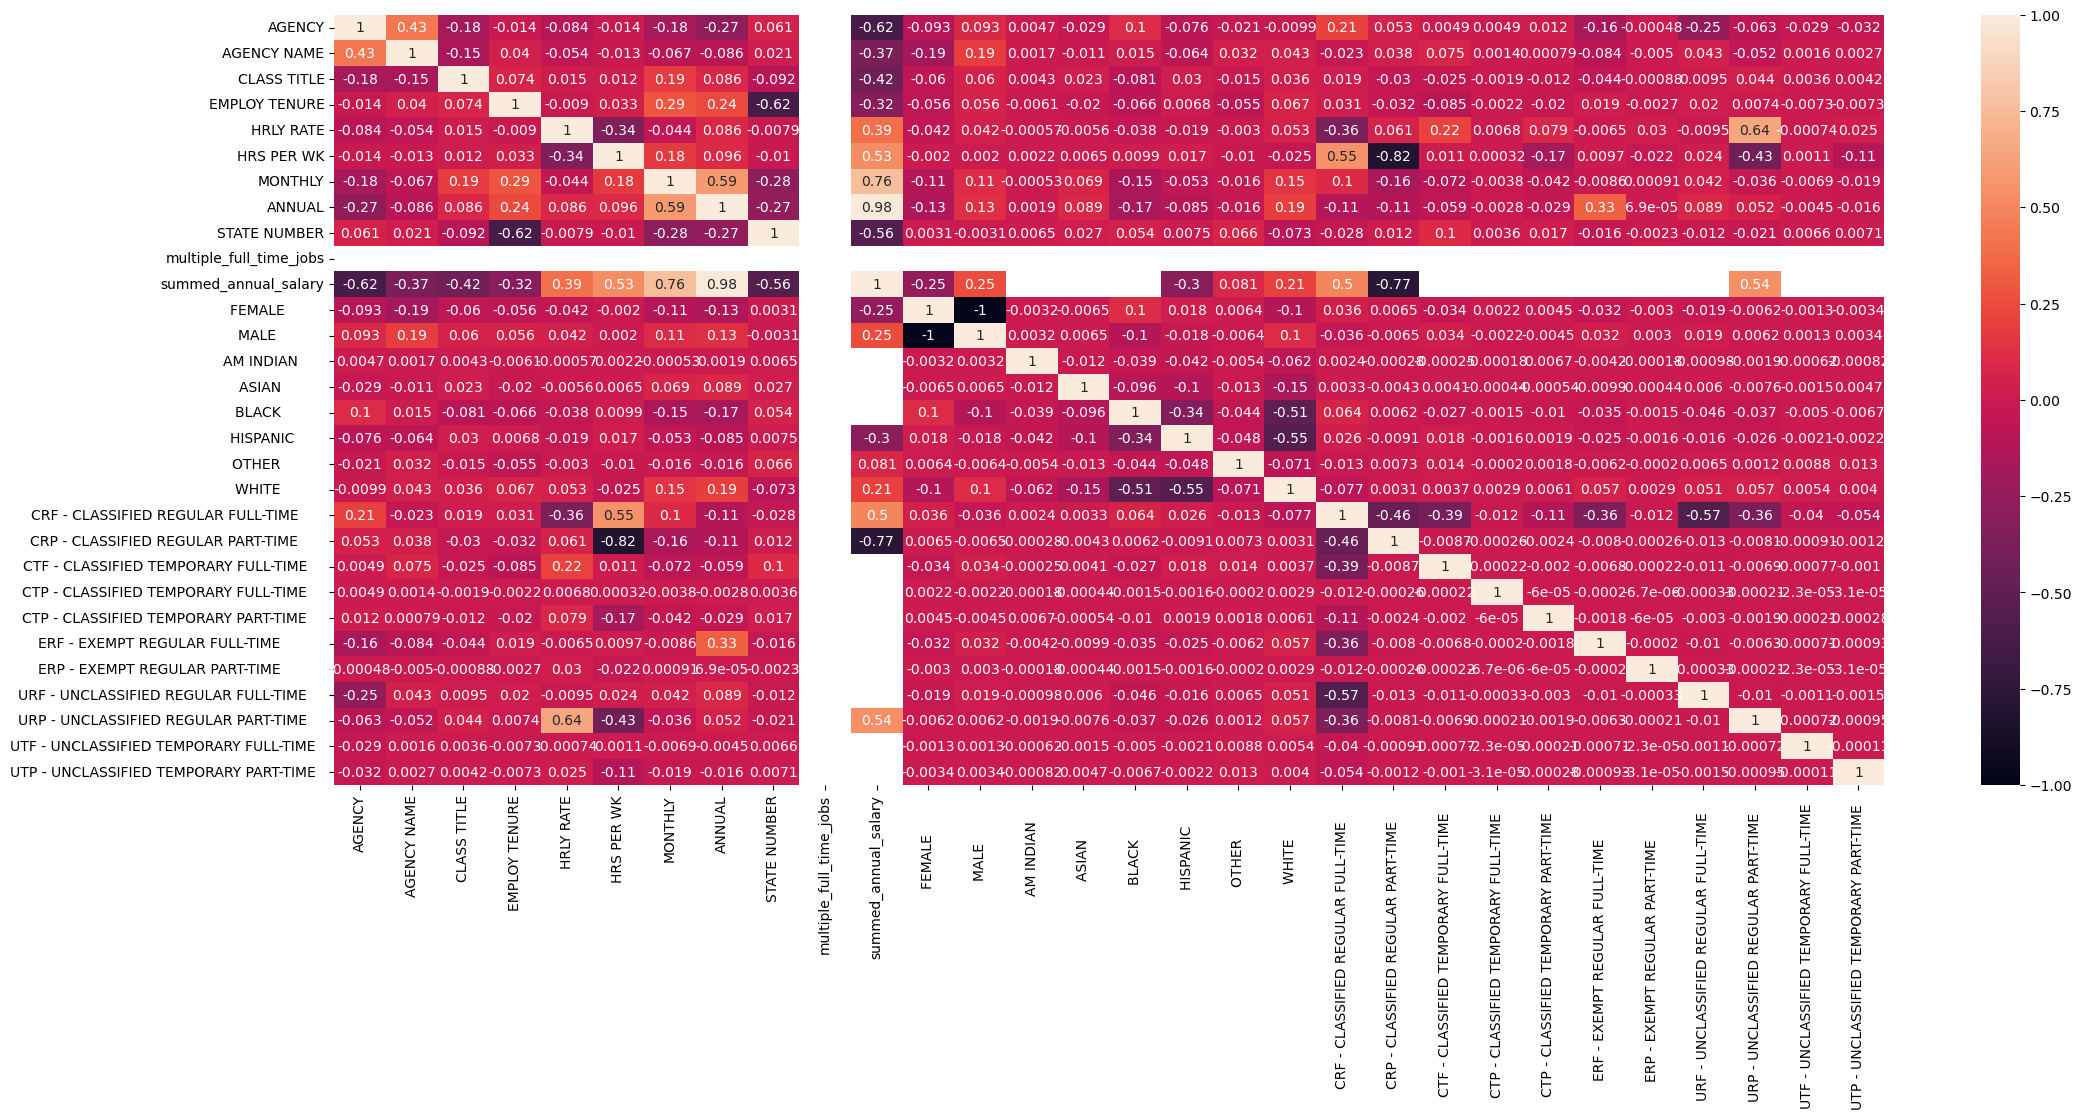

In [47]:
#heatmap

plt.figure(figsize=(25,10))  #figsize=(width , length)
sns.heatmap(df.corr(numeric_only=True) , annot=True)

In [48]:
#dropping out following features

df.drop(['AGENCY','duplicated','multiple_full_time_jobs', 'combined_multiple_jobs',
         'summed_annual_salary', 'hide_from_search','HRLY RATE','STATE NUMBER','HRS PER WK','CLASS CODE','LAST NAME', 'FIRST NAME', 'MI'
        ,'ETHNICITY', 'GENDER', 'STATUS'],inplace=True , axis=1)

In [49]:
df

,AGENCY NAME,CLASS TITLE,EMPLOY TENURE,MONTHLY,ANNUAL,FEMALE,MALE,AM INDIAN,ASIAN,BLACK,HISPANIC,OTHER,WHITE,CRF - CLASSIFIED REGULAR FULL-TIME,CRP - CLASSIFIED REGULAR PART-TIME,CTF - CLASSIFIED TEMPORARY FULL-TIME,CTP - CLASSIFIED TEMPORARY FULL-TIME,CTP - CLASSIFIED TEMPORARY PART-TIME,ERF - EXEMPT REGULAR FULL-TIME,ERP - EXEMPT REGULAR PART-TIME,URF - UNCLASSIFIED REGULAR FULL-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,UTF - UNCLASSIFIED TEMPORARY FULL-TIME,UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,17,711,-0.294088,-0.091748,114549.84,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,48,560,-0.110550,-1.927472,16857.24,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,17,711,-1.028243,-0.091748,114549.84,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,48,560,-0.661166,-1.927472,16857.24,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,88,292,-1.028243,-0.437344,39411.24,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,76,1198,-0.477627,-0.742798,34788.00,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
149477,76,1404,-0.110550,1.319358,66000.00,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
149478,76,324,0.440066,-2.152771,13447.20,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
149479,76,1007,-0.294088,1.512936,68929.92,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


# Model Creation

In [50]:
df.columns

Index(['AGENCY NAME', 'CLASS TITLE', 'EMPLOY TENURE', 'MONTHLY', 'ANNUAL',
       'FEMALE         ', 'MALE           ', 'AM INDIAN      ',
       'ASIAN          ', 'BLACK          ', 'HISPANIC       ',
       'OTHER          ', 'WHITE          ',
       'CRF - CLASSIFIED REGULAR FULL-TIME      ',
       'CRP - CLASSIFIED REGULAR PART-TIME      ',
       'CTF - CLASSIFIED TEMPORARY FULL-TIME    ',
       'CTP - CLASSIFIED TEMPORARY FULL-TIME    ',
       'CTP - CLASSIFIED TEMPORARY PART-TIME    ',
       'ERF - EXEMPT REGULAR FULL-TIME          ',
       'ERP - EXEMPT REGULAR PART-TIME          ',
       'URF - UNCLASSIFIED REGULAR FULL-TIME    ',
       'URP - UNCLASSIFIED REGULAR PART-TIME    ',
       'UTF - UNCLASSIFIED TEMPORARY FULL-TIME  ',
       'UTP - UNCLASSIFIED TEMPORARY PART-TIME  '],
      dtype='object')

In [51]:
# storing input features in x

x=df[['AGENCY NAME', 'CLASS TITLE','EMPLOY TENURE', 'MONTHLY',  'FEMALE         ', 'MALE           ', 'AM INDIAN      ', 'ASIAN          ',
      'BLACK          ', 'HISPANIC       ','OTHER          ', 'WHITE          ','CRF - CLASSIFIED REGULAR FULL-TIME      ',
      'CRP - CLASSIFIED REGULAR PART-TIME      ','CTF - CLASSIFIED TEMPORARY FULL-TIME    ','CTP - CLASSIFIED TEMPORARY FULL-TIME    ',
      'CTP - CLASSIFIED TEMPORARY PART-TIME    ', 'ERF - EXEMPT REGULAR FULL-TIME          ','ERP - EXEMPT REGULAR PART-TIME          ',
      'URF - UNCLASSIFIED REGULAR FULL-TIME    ','URP - UNCLASSIFIED REGULAR PART-TIME    ','UTF - UNCLASSIFIED TEMPORARY FULL-TIME  ',
      'UTP - UNCLASSIFIED TEMPORARY PART-TIME  ']]

# storing output feature in x

y=df['ANNUAL']

In [52]:
# splitting data for train-test , with the test size of 0.25

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=25 , test_size=0.25)

# Model Selection

## Improrting decesion tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [54]:
#fitting or feeding data to the model

dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [55]:
#making model ,to predict the data

pred=dt.predict(x_test)

### Evaluation

In [56]:
# importing regression metrics
from sklearn.metrics import mean_squared_error , r2_score

In [57]:
mean_squared_error(y_test,pred)

26888187.362594992

In [58]:
r2_score(y_test , pred)

0.9563246581313058

# Training data

In [59]:
T_pred=dt.predict(x_train)

In [60]:
mean_squared_error(y_train , T_pred)

1263934.9147410893

In [61]:
r2_score(y_train , T_pred)

0.9980125406759598

## Importing Knn - K nearest neighbours

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn

KNeighborsRegressor()

In [63]:
#fitting or feeding data to the model

knn.fit(x_test , y_test)

KNeighborsRegressor()

In [64]:
#making model ,to predict the data

pred=knn.predict(x_test)

### Evaluation

In [65]:
# importing regression metrics

from sklearn.metrics import mean_squared_error , r2_score

In [66]:
mean_squared_error(y_test , pred)

44180155.48650041

In [67]:
r2_score(y_test , pred)

0.9282367617919358

# Training data

In [68]:
T_pred=knn.predict(x_train)

In [69]:
mean_squared_error(y_train , T_pred)

73655852.12360671

In [70]:
r2_score(y_train , T_pred)

0.8841807371836252

## Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
r_r=RandomForestRegressor()
r_r

RandomForestRegressor()

In [72]:
#fitting or feeding data to the model

r_r.fit(x_train , y_train)

RandomForestRegressor()

In [73]:
#making model ,to predict the data

pred=r_r.predict(x_test)

### Evaluation

In [74]:
# importing regression metrics

from sklearn.metrics import mean_squared_error , r2_score

In [75]:
mean_squared_error(y_test , pred)

11454759.196644953

In [76]:
r2_score(y_test , pred)

0.9813936686326054

# Training data

In [77]:
T_pred=r_r.predict(x_train)

In [78]:
mean_squared_error(y_train , T_pred)

3161828.3625243804

In [79]:
r2_score(y_train , T_pred)

0.995028220846798

## Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
g_b=GradientBoostingRegressor()
g_b

GradientBoostingRegressor()

In [81]:
#fitting or feeding data to the model

g_b.fit(x_train , y_train)

GradientBoostingRegressor()

In [82]:
#making model ,to predict the data

pred=g_b.predict(x_test)

### Evaluation

In [83]:
# importing regression metrics

from sklearn.metrics import mean_squared_error , r2_score

In [84]:
mean_squared_error(y_test , pred)

48692634.29676187

In [85]:
r2_score(y_test , pred)

0.9209069982769889

# Training data

In [86]:
T_pred=g_b.predict(x_train)

In [87]:
mean_squared_error(y_train , T_pred)

51180727.67288878

In [88]:
r2_score(y_train , T_pred)

0.9195214775394638

## Xtreme Gradient Boosting

In [89]:
#!pip install xgboost

In [90]:
from xgboost import XGBRegressor
x_g_b=XGBRegressor()
x_g_b

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [91]:
#fitting or feeding data to the model

x_g_b.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [92]:
#making model ,to predict the data

pred=x_g_b.predict(x_test)

### Evaluation

In [93]:
# importing regression metrics

from sklearn.metrics import mean_squared_error , r2_score

In [94]:
mean_squared_error(y_test , pred)

25310326.96954442

In [95]:
r2_score(y_test , pred)

0.9588876271837837

# Training data

In [96]:
T_pred=x_g_b.predict(x_train)

In [97]:
mean_squared_error(y_train , T_pred)

15530271.388102109

In [100]:
r2_score(y_train , T_pred)

0.9755796106942093

# Model Comparison Report

###  To view the R² score for the training and testing data

In [101]:
models=pd.DataFrame({
    'Models'                   : ['DecisionTree' , 'Knn' , 'RandomForest' , 'GradientBoosting' ,'XtremeGradientBoosting' ],
    'r2_scores of testing data': [0.95,0.92,0.98,0.92 ,0.95 ],
    'r2_scores of training data':[0.99,0.88,0.99 , 0.91,0.97]
})

models

,Models,r2_scores of testing data,r2_scores of training data
0,DecisionTree,0.95,0.99
1,Knn,0.92,0.88
2,RandomForest,0.98,0.99
3,GradientBoosting,0.92,0.91
4,XtremeGradientBoosting,0.95,0.97


# Conclusion

#### All of the above models are generalized, as the difference between the training and testing R² scores is less than 0.5.

#### As we can see, Random Forest has the highest R² score (0.98). Decision Tree and Xtreme Gradient Boosting both have R² scores of 0.95. However, I would suggest using KNN or Gradient Boosting, as they have slightly lower R² scores but are likely to produce fewer errors and can be considered more generalized models for production."


#### The Mean Squared Error (MSE) is high because most of the data points in the output column lie between 0 and 1,20,000 (Q1 = 36,238.08, Q2 = 44,642.04, Q3 = 58,389.72, Max = 5,53,500.00). The model is primarily trained on this range. During prediction, some actual values may lie between 4 to 5 lakhs, while the model might still predict within the 0 to 1,20,000 range. As a result, the residuals (calculated as actual value - predicted value) become large, leading to a high Mean Squared Error

# Report on Challenges faced.

### Create a report which should include challenges you faced on data

### What technique used with proper reason
